In [20]:
import pandas as pd
data = pd.read_csv('C:/Users/user/Desktop/finall_linear.csv',encoding='ms949')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64260 entries, 0 to 64259
Data columns (total 39 columns):
Unnamed: 0        64260 non-null int64
X0.5m.지중온도..C.    1106 non-null float64
A_NUMPOINT        64260 non-null int64
B_NUMPOINT        64260 non-null int64
C_NUMPOINT        64260 non-null int64
D_NUMPOINT        64260 non-null int64
E_NUMPOINT        64260 non-null int64
F_NUMPOINT        64260 non-null int64
G_NUMPOINT        64260 non-null int64
m_count           64260 non-null int64
year              64260 non-null int64
비율                64260 non-null float64
사업구분명             61866 non-null object
사업구분코드            61866 non-null float64
산도                61778 non-null float64
시군구명              64260 non-null object
시료유형명             61866 non-null object
시료유형코드            61866 non-null float64
실제비료마그네슘사용량       61670 non-null float64
실제비료석회사용량         61587 non-null float64
실제비료칼리사용량         61779 non-null float64
용도구분코드            61866 non-null float64
유기물함량        

### 결측치 탐색

In [4]:
data_na_sum = data.isnull().sum()
print(data_na_sum)

Unnamed: 0            0
X0.5m.지중온도..C.    63154
A_NUMPOINT            0
B_NUMPOINT            0
C_NUMPOINT            0
D_NUMPOINT            0
E_NUMPOINT            0
F_NUMPOINT            0
G_NUMPOINT            0
m_count               0
year                  0
비율                    0
사업구분명              2394
사업구분코드             2394
산도                 2482
시군구명                  0
시료유형명              2394
시료유형코드             2394
실제비료마그네슘사용량        2590
실제비료석회사용량          2673
실제비료칼리사용량          2481
용도구분코드             2394
유기물함량              2910
유효규산농도            16115
유효인산농도             2646
입력기준일자                0
최고기온..C.              0
최다풍향.16방위.            7
최대.풍속.m.s.            0
최저기온..C.              0
평균.상대습도...            6
평균.전운량.1.10.      54117
평균.지면온도..C.           0
평균.풍속.m.s.            0
평균.현지기압.hPa.          0
평균기온..C.              0
합계.일사.MJ.m2.      50865
지난해출현수                0
피해발생위험지수              0
dtype: int64


### 분석용 변수 추가 선별

In [6]:
data = pd.read_csv('C:/Users/user/Desktop/finall_linear.csv',encoding='ms949')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64260 entries, 0 to 64259
Data columns (total 32 columns):
A_NUMPOINT      64260 non-null int64
B_NUMPOINT      64260 non-null int64
C_NUMPOINT      64260 non-null int64
D_NUMPOINT      64260 non-null int64
E_NUMPOINT      64260 non-null int64
F_NUMPOINT      64260 non-null int64
G_NUMPOINT      64260 non-null int64
m_count         64260 non-null int64
비율              64260 non-null float64
사업구분명           61866 non-null object
산도              61778 non-null float64
시료유형명           61866 non-null object
실제비료마그네슘사용량     61670 non-null float64
실제비료석회사용량       61587 non-null float64
실제비료칼리사용량       61779 non-null float64
유기물함량           61350 non-null float64
유효규산농도          48145 non-null float64
유효인산농도          61614 non-null float64
최고기온..C.        64260 non-null float64
최다풍향.16방위.      64253 non-null float64
최대.풍속.m.s.      64260 non-null float64
최저기온..C.        64260 non-null float64
평균.상대습도...      64254 non-null float64
평균.전운량.1.10.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
category = [col for col in data.columns if data[col].dtypes == 'object']
category

['사업구분명', '시료유형명']

### 한글사용

In [12]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 명목변수 막대그래프

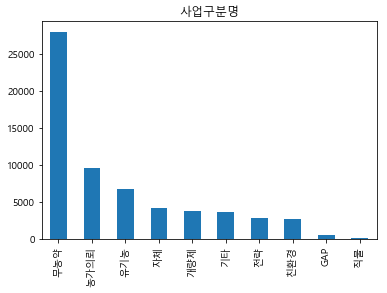

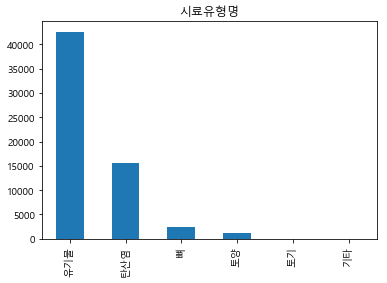

In [13]:
for col in category:
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

### 수치형변수분리

In [37]:
data1 = list(set(data.columns) - set(category))
data1 = np.sort(data1)
data1

array(['A_NUMPOINT', 'B_NUMPOINT', 'C_NUMPOINT', 'D_NUMPOINT',
       'E_NUMPOINT', 'F_NUMPOINT', 'G_NUMPOINT', 'Unnamed: 0', 'm_count',
       'y', '농사법_기타', '농사법_무농약', '농사법_유기농', '비율', '산도', '시료명_기타', '시료명_뼈',
       '시료명_유기물', '시료명_탄산염', '시료명_토기', '시료명_토양', '실제비료마그네슘사용량',
       '실제비료석회사용량', '실제비료칼리사용량', '유기물함량', '유효규산농도', '유효인산농도', '일강수량.mm.',
       '지난해출현수', '최고기온..C.', '최다풍향.16방위.', '최대.풍속.m.s.', '최저기온..C.',
       '평균.상대습도...', '평균.전운량.1.10.', '평균.지면온도..C.', '평균.풍속.m.s.',
       '평균.현지기압.hPa.', '평균기온..C.', '피해발생위험지수', '합계.일사.MJ.m2.'],
      dtype='<U12')

### 수치형 변수 히스토그램

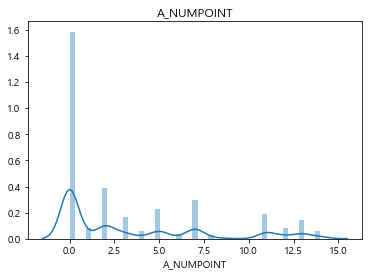

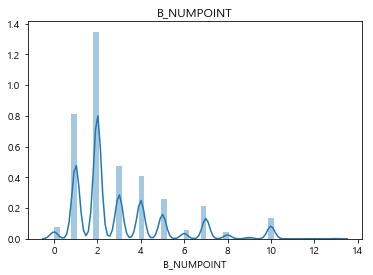

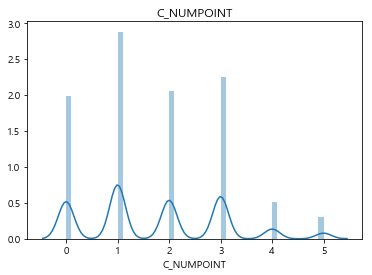

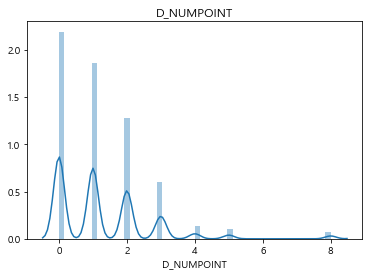

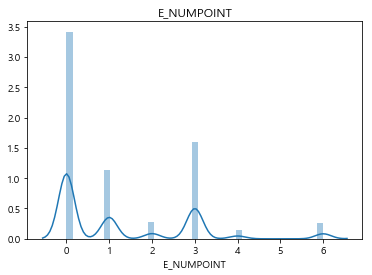

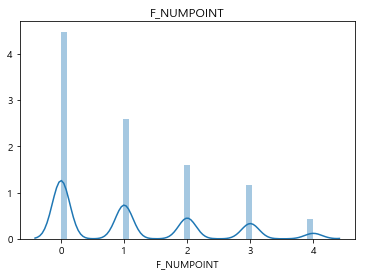

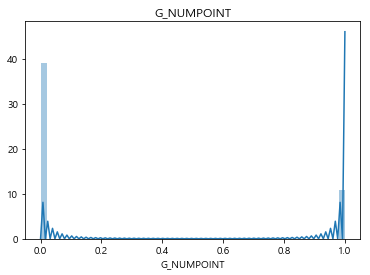

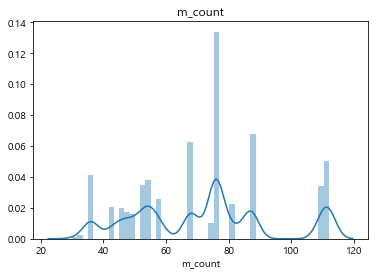

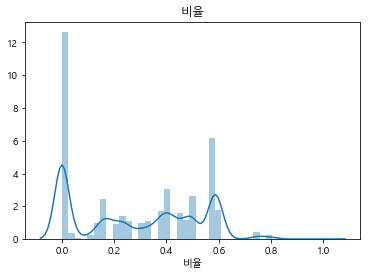

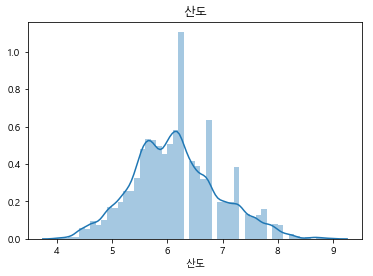

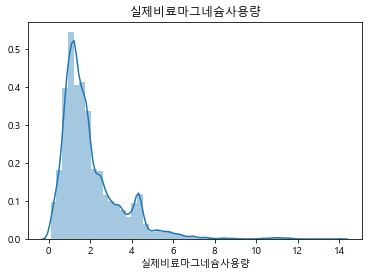

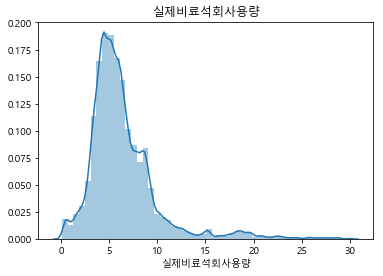

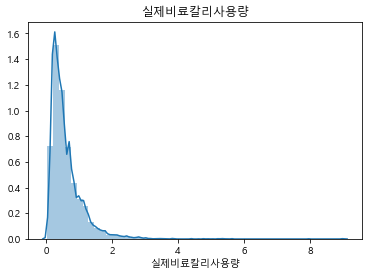

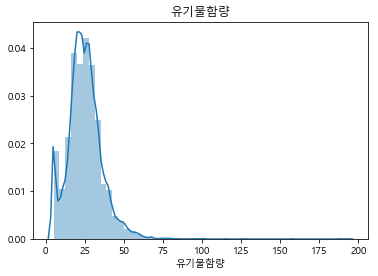

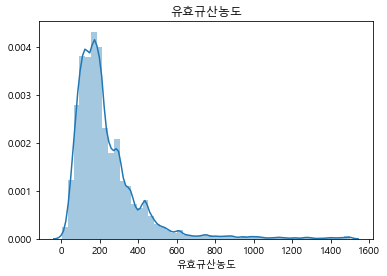

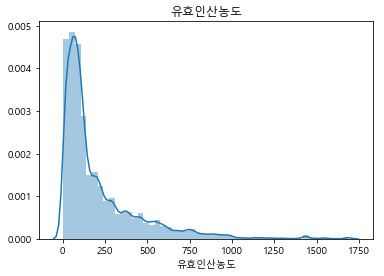

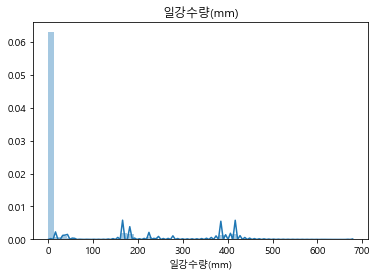

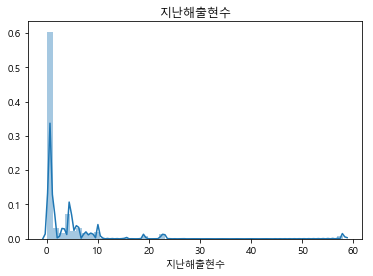

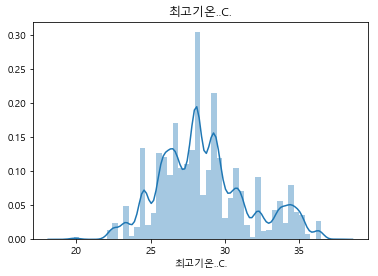

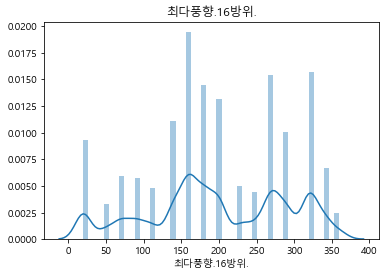

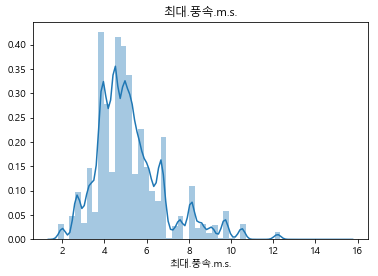

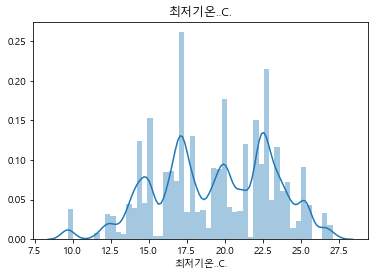

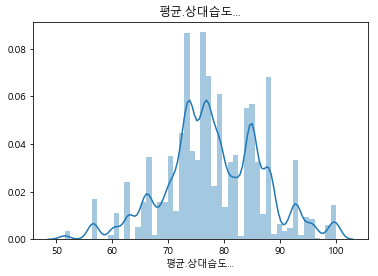

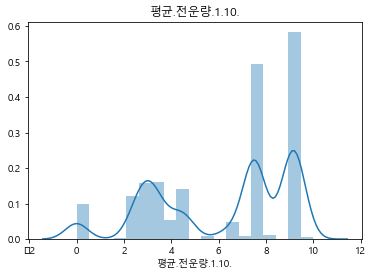

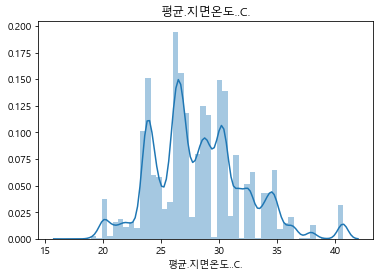

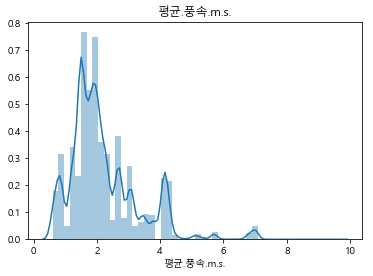

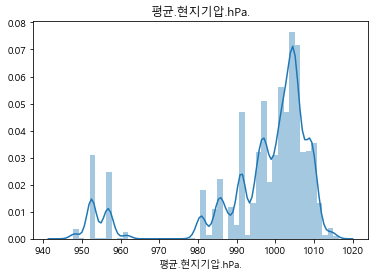

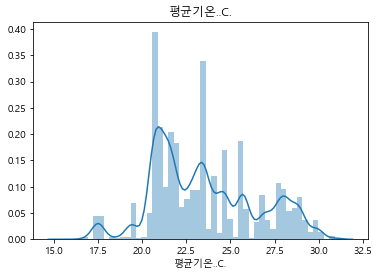

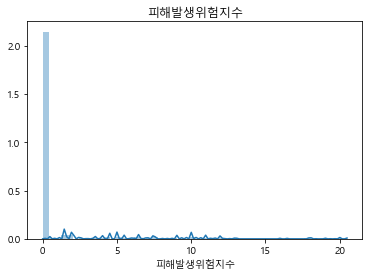

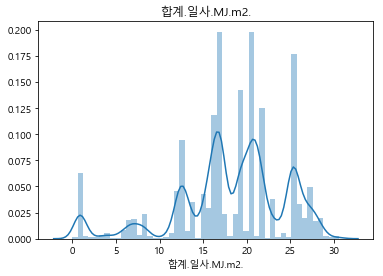

In [25]:
for col in data1:
    sns.distplot(data.loc[data[col].notnull(),col])
    plt.title(col)
    plt.show()

In [26]:
pd.get_dummies(data['사업구분명'])

,GAP,개량제,기타,농가의뢰,무농약,유기농,자체,전략,직불,친환경
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


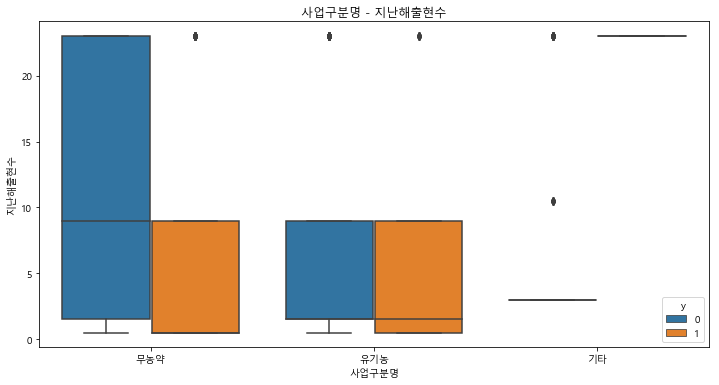

In [35]:
data = pd.read_csv('C:/Users/user/Desktop/logistic_dummy.csv',encoding='ms949')
unique_list = data['사업구분명'].unique()
 
plt.figure(figsize=(12,6))
sns.boxplot(x='사업구분명', y='지난해출현수', hue='y', data=data.dropna())
plt.title("사업구분명 - {}".format('지난해출현수'))
plt.show()

In [36]:
data

,Unnamed: 0,A_NUMPOINT,B_NUMPOINT,C_NUMPOINT,D_NUMPOINT,E_NUMPOINT,F_NUMPOINT,G_NUMPOINT,m_count,비율,...,y,농사법_기타,농사법_무농약,농사법_유기농,시료명_기타,시료명_뼈,시료명_유기물,시료명_탄산염,시료명_토기,시료명_토양
0,0,3,3,0,0,0,0,0,112,0.000000,...,0,0,1,0,0,0,1,0,0,0
1,1,3,3,0,0,0,0,0,112,0.000000,...,0,0,1,0,0,0,1,0,0,0
2,2,3,3,0,0,0,0,0,112,0.000000,...,0,0,1,0,0,0,1,0,0,0
3,3,3,3,0,0,0,0,0,112,0.000000,...,0,0,1,0,0,0,1,0,0,0
4,4,3,3,0,0,0,0,0,112,0.000000,...,0,0,1,0,0,0,1,0,0,0
5,5,3,3,0,0,0,0,0,112,0.000000,...,0,0,1,0,0,0,1,0,0,0
6,6,0,1,2,1,0,0,0,68,0.250000,...,0,1,0,0,0,0,1,0,0,0
7,7,0,1,2,1,0,0,0,68,0.250000,...,0,1,0,0,0,0,1,0,0,0
8,8,0,1,2,1,0,0,0,68,0.250000,...,0,1,0,0,0,0,1,0,0,0
9,9,0,1,2,1,0,0,0,68,0.250000,...,0,1,0,0,0,0,1,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


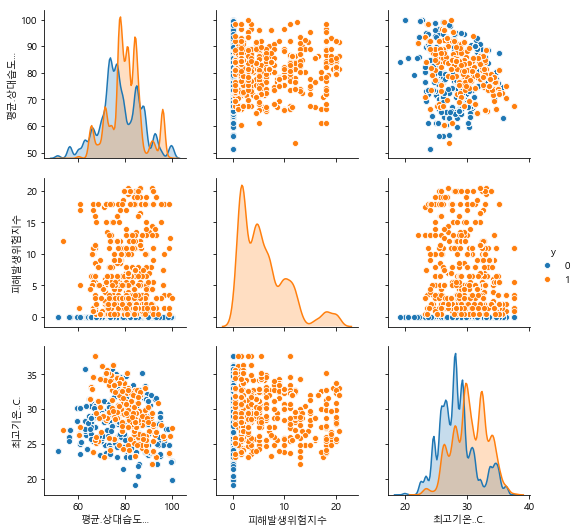

In [41]:
sns.pairplot(data[list(a) + ['y']], hue='y', 
             x_vars=a, y_vars=a)
plt.show()


In [40]:
a=['평균.상대습도...','피해발생위험지수','최고기온..C.']

### 결측치 중앙값 대체

In [43]:
df1 = data.where(pd.notnull(data),data.median(),axis='columns')

In [46]:
df1.to_csv('C:/Users/user/Desktop/not_null_log_dummy.csv',encoding='ms949')